# Winter 2021 Data Science Intern Challenge 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b.	What metric would you report for this dataset?

c.	What is its value?


In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')

In [4]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Calculating average order value (AOV) for all the orders

In [5]:
df['order_amount'].mean()

3145.128

Calculating median order value (50%) for all the orders

In [6]:
df['order_amount'].median()

284.0

A significant difference between the average order value and the median demonstrates that order values do not have a normal distribution.  The median value represents the fifty percentile, which means half of the orders have less  value than 284, and the other half are more than this figure. For finding the actual distribution of order values, I proceed with a histogram for all data.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

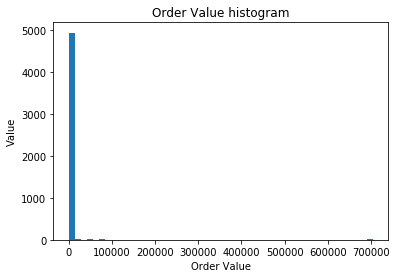

In [8]:
plt.figure()
plt.hist(df['order_amount'], bins=50)
plt.xlabel('Order Value')
plt.ylabel('Value')
plt.title('Order Value histogram')
plt.show()

Data distribution has positive skewness (median < mean) with a long tail, which means ranging data from less than 1000 to 700,000. To study data distribution in more details, I divide a whole data set into three distinct categories:

1.	Order values equal or more than 100,000
2.	Order values between 1,000 and 100,000
3.	Order values less than or equal to 1000


In [9]:
df2=df.query("order_amount>=100000").copy()

In [10]:
df2.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00


In [11]:
df2['shop_id'].unique()

array([42, 78], dtype=int64)

All the orders with values more than 100,000 belong to two shops (Id: 42 & 78). Probably these two shops are wholesalers that handle bulk orders. The average order value for this category is 643,434.21

In [12]:
df2['order_amount'].mean()

643434.2105263158

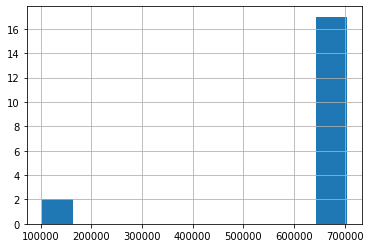

In [13]:
df2['order_amount'].hist()

Due to the left skewness, average is not a proper measure in this group. Median is the right value here : 704,000

In [14]:
df2['order_amount'].median()

704000.0

In [15]:
df3=df.query("(order_amount>1000) & (order_amount<100000)").copy()

In [16]:
df3.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42


In [17]:
df3['shop_id'].unique()

array([78, 42, 43, 54], dtype=int64)

All the orders with values more than 1,000 and less than 100,00 belong to four shops (Id: 42,43,54 & 78).  No surprise for stores 42 and 78 as those are wholesalers (probably), and I consider stores 43 and 54 as the medium-size retailers. The average order value for this category is 38,777.77

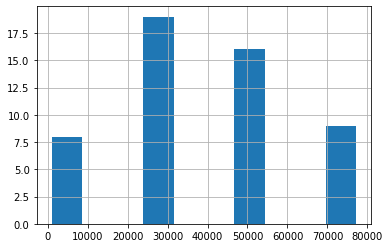

In [18]:
df3['order_amount'].hist(bins=10)

Due to approximate normal distribution, the mean value is a suitable measure for this group

In [19]:
df3['order_amount'].mean()

38777.769230769234

In [20]:
df4=df.query("order_amount<=1000").copy()

The main category for this exercise is the last one. Order values that are equal or less than 1000. The majority of the orders are in this group. The average order value is 301, and the median is 284!

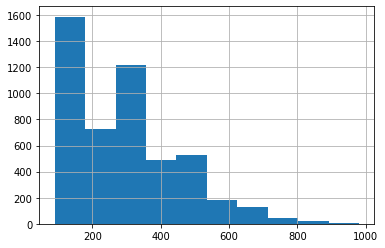

In [21]:
df4['order_amount'].hist(bins=10)

In [22]:
df4['order_amount'].mean()

301.06431324812337

In [23]:
df4['order_amount'].median()

284.0

### Based on all the findings I report median value for this question and the value is 284